### Importando Bibliotecas

In [4]:
import mlflow
import mlflow.sklearn
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("credit.csv")
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [6]:
# Dimensões do arquivo
df.shape

(1000, 21)

In [7]:
# Remover valores nulos
df = df.dropna()

# Remover duplicatas
df = df.drop_duplicates()

# Normalizar nomes das colunas
df.columns = df.columns.str.lower().str.replace(' ', '_')




In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [9]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [10]:
for col in df:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category').cat.codes

In [11]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6.0,1,6,1169.0,4,3,4.0,3,2,...,3,67.0,1,1,2.0,1,1.0,1,1,1
1,0,48.0,3,6,5951.0,2,0,2.0,0,2,...,3,22.0,1,1,1.0,1,1.0,0,1,0
2,3,12.0,1,2,2096.0,2,1,2.0,3,2,...,3,49.0,1,1,1.0,3,2.0,0,1,1
3,1,42.0,3,3,7882.0,2,1,2.0,3,1,...,1,45.0,1,0,1.0,1,2.0,0,1,1
4,1,24.0,2,4,4870.0,2,0,3.0,3,2,...,2,53.0,1,0,2.0,1,2.0,0,1,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   int8   
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   int8   
 3   purpose                 1000 non-null   int8   
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   int8   
 6   employment              1000 non-null   int8   
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   int8   
 9   other_parties           1000 non-null   int8   
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   int8   
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   int8   
 14  housing                 1000 non-null   i

### Separar em train e test

In [13]:
previsoes = df.iloc[:,0:20].values
classe = df.iloc[:,20:]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(previsoes, classe, test_size=0.3, random_state= 123)

### Treinamento do Algoritmo

c:\Users\adair\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\adair\anaconda3\Lib\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")
2025/03/29 16:33:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Modelo:  614243a6a77344d59ac1eb84ac5c9a28


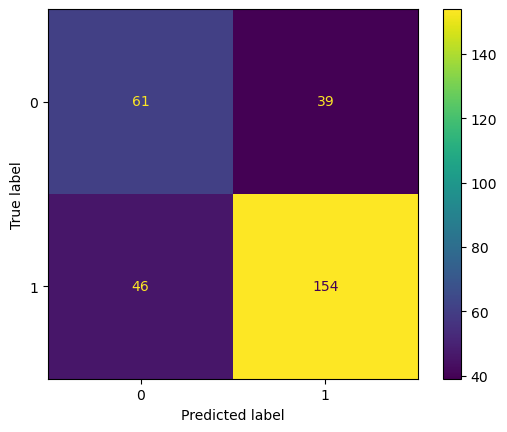

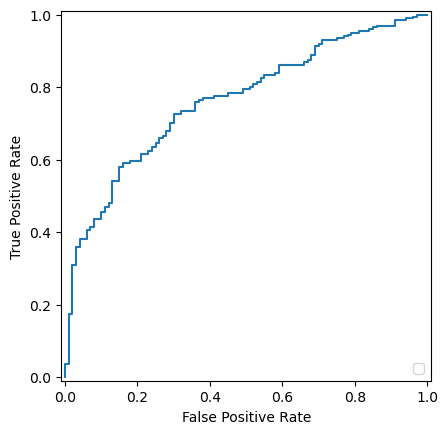

In [17]:
# criar Experimento
mlflow.set_experiment('NB_modulo4_MLOPS')

# run do experimento
with mlflow.start_run():
    naive_bayes = GaussianNB()
    naive_bayes.fit(X_train, y_train)
    previsoes = naive_bayes.predict(X_test)

    # metricas 
    acuracia = accuracy_score(y_test, previsoes)
    recall =  recall_score(y_test, previsoes)
    precision = precision_score(y_test, previsoes)
    f1 = f1_score(y_test, previsoes)
    auc = roc_auc_score(y_test, previsoes)
    log = log_loss(y_test, previsoes)

    # registrar metricas
    mlflow.log_metric('acuracia', acuracia)
    mlflow.log_metric('recall', recall)
    mlflow.log_metric('precision', precision)
    mlflow.log_metric('f1', f1)
    mlflow.log_metric('auc', auc)
    mlflow.log_metric('log', log)

    # Matriz de confusão
    cm = confusion_matrix(y_test, previsoes)
    confusion_disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    confusion_disp.plot() # Exibe a matriz de confusão
    plt.savefig('confusion.png')

    # Curva Roc
    fpr, tpr, _ = roc_curve(y_test, naive_bayes.predict_proba(X_test)[:, 1]) #Calcula a curva Roc
    roc_disp = RocCurveDisplay(fpr=fpr, tpr=tpr)
    roc_disp.plot() # Exibe a curva Roc 
    plt.savefig('roc.png') # Salva o grafico da curva ROC

    # logar graficos 
    mlflow.log_artifact('confusion.png')
    mlflow.log_artifact('roc.png')

    # Modelo
    mlflow.sklearn.log_model(naive_bayes, 'ModeloNB')

    # Informações da execução
    print('Modelo: ', mlflow.active_run().info.run_uuid)
mlflow.end_run() 


